In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_stata('dataset.DTA',index_col='caseid')

In [4]:
df.head()

,v012,v025,v106,v190a,v191a,v414k,v445,v457,v701,v714,bord,b4,b8,m4,m18,h11,h22,hw57,hw73
caseid,,,,,,,,,,,,,,,,,,,
0100101399 02,38,rural,secondary,richer,833130,NaN,2919.0,not anemic,NaN,NaN,3,male,4.0,24.0,average,no,no,moderate,flagged cases
0100101357 02,39,rural,primary,poorer,-667160,no,2213.0,severe,NaN,NaN,4,female,1.0,still breastfeeding,average,no,no,moderate,-206.0
0100101395 02,35,rural,secondary,poorest,-1143950,NaN,3041.0,moderate,NaN,NaN,1,female,2.0,still breastfeeding,average,no,no,moderate,-162.0
0100101358 04,30,rural,secondary,middle,220010,no,2566.0,moderate,NaN,NaN,1,male,1.0,still breastfeeding,average,no,yes,moderate,flagged cases
0100101380 02,32,rural,secondary,middle,145040,NaN,5255.0,moderate,NaN,NaN,2,male,3.0,still breastfeeding,larger than average,no,no,moderate,-480.0


In [5]:
df = df.rename(columns={'v012':'Mom_Age','v025':'Residence','v190a':'Wealth_index','v106':'Education_level','v457':'Child_anaemia','v701':'Husband_education_level','v714':'Working_status','bord':'Birth_order','b4':'Sex','b8':'Age','m4':'Brest_fed','m18':'Size_of_child','h11':'Diarrhea','h22':'Fever','hw57':'Respondent_anaemic_level','hw73':'BMI_std','v414k':'Vitamin_A','v445':'Mothers_BMI'})

In [6]:
df = df.drop(['v191a','Husband_education_level','Working_status'],axis=1)
df = df.rename_axis("id")
df

,Mom_Age,Residence,Education_level,Wealth_index,Vitamin_A,Mothers_BMI,Child_anaemia,Birth_order,Sex,Age,Brest_fed,Size_of_child,Diarrhea,Fever,Respondent_anaemic_level,BMI_std
id,,,,,,,,,,,,,,,,
0100101399 02,38,rural,secondary,richer,NaN,2919.0,not anemic,3,male,4.0,24.0,average,no,no,moderate,flagged cases
0100101357 02,39,rural,primary,poorer,no,2213.0,severe,4,female,1.0,still breastfeeding,average,no,no,moderate,-206.0
0100101395 02,35,rural,secondary,poorest,NaN,3041.0,moderate,1,female,2.0,still breastfeeding,average,no,no,moderate,-162.0
0100101358 04,30,rural,secondary,middle,no,2566.0,moderate,1,male,1.0,still breastfeeding,average,no,yes,moderate,flagged cases
0100101380 02,32,rural,secondary,middle,NaN,5255.0,moderate,2,male,3.0,still breastfeeding,larger than average,no,no,moderate,-480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401542 04,24,urban,no education,poorest,yes,2171.0,moderate,1,female,1.0,still breastfeeding,smaller than average,no,no,moderate,6.0
3700401583 04,35,urban,secondary,poorer,NaN,2462.0,severe,1,male,3.0,still breastfeeding,average,no,no,moderate,-202.0
3700401546 02,35,urban,no education,middle,no,2637.0,moderate,2,male,1.0,still breastfeeding,average,no,no,severe,-68.0


In [7]:
df.describe()

,Mom_Age,Birth_order,Age
count,232920.000000,232920.000000,224218.000000
mean,27.317633,2.152391,2.025939
std,5.038063,1.347946,1.425702
min,15.000000,1.000000,0.000000
25%,24.000000,1.000000,1.000000
50%,27.000000,2.000000,2.000000
75%,30.000000,3.000000,3.000000
max,49.000000,16.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232920 entries,   0100101399 02 to   3700401592 04
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Mom_Age                   232920 non-null  int8    
 1   Residence                 232920 non-null  category
 2   Education_level           232920 non-null  category
 3   Wealth_index              232920 non-null  category
 4   Vitamin_A                 127648 non-null  category
 5   Mothers_BMI               227010 non-null  category
 6   Child_anaemia             224383 non-null  category
 7   Birth_order               232920 non-null  int8    
 8   Sex                       232920 non-null  category
 9   Age                       224218 non-null  float64 
 10  Brest_fed                 186182 non-null  category
 11  Size_of_child             232920 non-null  category
 12  Diarrhea                  224218 non-null  category
 13  Fever      

In [9]:
df.isnull().sum()

Mom_Age                          0
Residence                        0
Education_level                  0
Wealth_index                     0
Vitamin_A                   105272
Mothers_BMI                   5910
Child_anaemia                 8537
Birth_order                      0
Sex                              0
Age                           8702
Brest_fed                    46738
Size_of_child                    0
Diarrhea                      8702
Fever                         8702
Respondent_anaemic_level     49065
BMI_std                      21917
dtype: int64

In [10]:
df.shape

(232920, 16)

In [11]:
df.columns


Index(['Mom_Age', 'Residence', 'Education_level', 'Wealth_index', 'Vitamin_A',
       'Mothers_BMI', 'Child_anaemia', 'Birth_order', 'Sex', 'Age',
       'Brest_fed', 'Size_of_child', 'Diarrhea', 'Fever',
       'Respondent_anaemic_level', 'BMI_std'],
      dtype='object')

**LABEL ENCODING**

In [12]:
label_cols = ['Education_level','Wealth_index','Respondent_anaemic_level','Child_anaemia','Birth_order','Size_of_child']

In [13]:
df = df.dropna(subset=['Child_anaemia','Sex','Age','Fever','Diarrhea','Mothers_BMI','BMI_std'])

In [14]:
df.isnull().sum()

Mom_Age                         0
Residence                       0
Education_level                 0
Wealth_index                    0
Vitamin_A                   92125
Mothers_BMI                     0
Child_anaemia                   0
Birth_order                     0
Sex                             0
Age                             0
Brest_fed                   40203
Size_of_child                   0
Diarrhea                        0
Fever                           0
Respondent_anaemic_level    25916
BMI_std                         0
dtype: int64

In [15]:
ed = pd.Categorical(df['Education_level'], categories=['no education', 'primary', 'secondary','higher'], ordered=True)

# label encode the column based on the defined order
df['Education_level'] = ed.codes

C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\464207963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_level'] = ed.codes


In [16]:
df

,Mom_Age,Residence,Education_level,Wealth_index,Vitamin_A,Mothers_BMI,Child_anaemia,Birth_order,Sex,Age,Brest_fed,Size_of_child,Diarrhea,Fever,Respondent_anaemic_level,BMI_std
id,,,,,,,,,,,,,,,,
0100101399 02,38,rural,2,richer,NaN,2919.0,not anemic,3,male,4.0,24.0,average,no,no,moderate,flagged cases
0100101357 02,39,rural,1,poorer,no,2213.0,severe,4,female,1.0,still breastfeeding,average,no,no,moderate,-206.0
0100101395 02,35,rural,2,poorest,NaN,3041.0,moderate,1,female,2.0,still breastfeeding,average,no,no,moderate,-162.0
0100101358 04,30,rural,2,middle,no,2566.0,moderate,1,male,1.0,still breastfeeding,average,no,yes,moderate,flagged cases
0100101380 02,32,rural,2,middle,NaN,5255.0,moderate,2,male,3.0,still breastfeeding,larger than average,no,no,moderate,-480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401542 04,24,urban,0,poorest,yes,2171.0,moderate,1,female,1.0,still breastfeeding,smaller than average,no,no,moderate,6.0
3700401583 04,35,urban,2,poorer,NaN,2462.0,severe,1,male,3.0,still breastfeeding,average,no,no,moderate,-202.0
3700401546 02,35,urban,0,middle,no,2637.0,moderate,2,male,1.0,still breastfeeding,average,no,no,severe,-68.0


In [17]:
wealth = pd.Categorical(df['Wealth_index'], categories=['poorest', 'poorer', 'middle','richer','richest'], ordered=True)

# label encode the column based on the defined order
df['Wealth_index'] = wealth.codes

C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\3739658406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wealth_index'] = wealth.codes


In [18]:
mom_anaemia = pd.Categorical(df['Respondent_anaemic_level'], categories=['not anemic', 'mild', 'moderate','severe'], ordered=True)

# label encode the column based on the defined order
df['Respondent_anaemic_level'] = mom_anaemia.codes

child_anemic = pd.Categorical(df['Child_anaemia'], categories=['not anemic', 'mild', 'moderate','severe'], ordered=True)

# label encode the column based on the defined order
df['Child_anaemia'] = child_anemic.codes


C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\614166948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Respondent_anaemic_level'] = mom_anaemia.codes
C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\614166948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Child_anaemia'] = child_anemic.codes


In [19]:
df['Size_of_child'] = df['Size_of_child'].replace("don't know","average")
print(df['Size_of_child'].value_counts())

C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\468179388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_of_child'] = df['Size_of_child'].replace("don't know","average")


average                 149984
larger than average      23718
smaller than average     15929
very large               13658
very small                4369
Name: Size_of_child, dtype: int64


In [20]:
size = pd.Categorical(df['Size_of_child'], categories=['very small', 'smaller than average', 'average','larger than average', 'very large'], ordered=True)

# label encode the column based on the defined order
df['Size_of_child'] = size.codes


C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\953020905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_of_child'] = size.codes


**ONE HOT ENCODING**

In [21]:
df.isnull().sum()

Mom_Age                         0
Residence                       0
Education_level                 0
Wealth_index                    0
Vitamin_A                   92125
Mothers_BMI                     0
Child_anaemia                   0
Birth_order                     0
Sex                             0
Age                             0
Brest_fed                   40203
Size_of_child                   0
Diarrhea                        0
Fever                           0
Respondent_anaemic_level        0
BMI_std                         0
dtype: int64

In [22]:
one_hot_label = ['Sex','Age','Brest_fed','Residence','Diarrhea','Fever']

In [23]:
print(df['Vitamin_A'].value_counts())
print(df['Brest_fed'].value_counts())

no            100726
yes            14779
don't know        28
Name: Vitamin_A, dtype: int64
still breastfeeding    100479
never breastfed         12156
24.0                    10356
12.0                     7203
6.0                      4332
                        ...  
64.0                        1
73.0                        1
58.0                        1
57.0                        1
59.0                        1
Name: Brest_fed, Length: 77, dtype: int64


In [24]:
# df['Brest_fed'] = df['Brest_fed'].fillna(pd.Series(np.random.choice(['still breastfeeding', 'never breastfed'], p=[0.93, 0.07], size=len(df))))


In [25]:
print(df['Diarrhea'].value_counts())



no                     192971
yes, last two weeks     14479
don't know                208
Name: Diarrhea, dtype: int64


In [26]:
df['Vitamin_A'] = df['Vitamin_A'].replace("don't know","yes")
df['Brest_fed'] = df['Brest_fed'].astype(str).replace(to_replace=r'\d+\.\d+', value='still breastfeeding', regex=True)
df['Brest_fed'] = df['Brest_fed'].replace("don't know","still breastfeeding")
df['Fever'] = df['Fever'].replace("don't know","no")
df['Diarrhea'] = df['Diarrhea'].replace("don't know","no")


C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\3989075720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vitamin_A'] = df['Vitamin_A'].replace("don't know","yes")
C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\3989075720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brest_fed'] = df['Brest_fed'].astype(str).replace(to_replace=r'\d+\.\d+', value='still breastfeeding', regex=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\3989075720.py:3: SettingWithCopyWarning: 
A value is tr

In [27]:
df.replace(['None', 'NA', 'NaN'], np.nan, inplace=True)
df['Vitamin_A'] = df['Vitamin_A'].fillna(df['Vitamin_A'].mode()[0])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\2479546557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['None', 'NA', 'NaN'], np.nan, inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\2479546557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vitamin_A'] = df['Vitamin_A'].fillna(df['Vitamin_A'].mode()[0])


In [28]:
one_hot = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Sex', axis=1)


In [29]:
# one_hot = pd.get_dummies(df['Brest_fed'], prefix='Brest_fed', drop_first=True)

# # concatenate the one-hot encoded dataframe with the original dataframe
# df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Brest_fed', axis=1)

In [30]:
one_hot = pd.get_dummies(df['Residence'], prefix='Residence', drop_first=True)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Residence', axis=1)


In [31]:
one_hot = pd.get_dummies(df['Diarrhea'], prefix='Diarrhea', drop_first=True)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Diarrhea', axis=1)


In [32]:
one_hot = pd.get_dummies(df['Fever'], prefix='Fever', drop_first=True)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Fever', axis=1)


In [33]:
one_hot = pd.get_dummies(df['Vitamin_A'], prefix='Vitamin_A', drop_first=True)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical column
df = df.drop('Vitamin_A', axis=1)


In [34]:
df


,Mom_Age,Education_level,Wealth_index,Mothers_BMI,Child_anaemia,Birth_order,Age,Size_of_child,Respondent_anaemic_level,BMI_std,Sex_female,Residence_rural,"Diarrhea_yes, last two weeks",Fever_yes,Vitamin_A_yes
id,,,,,,,,,,,,,,,
0100101399 02,38,2,3,2919.0,0,3,4.0,2,2,flagged cases,0,1,0,0,0
0100101357 02,39,1,1,2213.0,3,4,1.0,2,2,-206.0,1,1,0,0,0
0100101395 02,35,2,0,3041.0,2,1,2.0,2,2,-162.0,1,1,0,0,0
0100101358 04,30,2,2,2566.0,2,1,1.0,2,2,flagged cases,0,1,0,1,0
0100101380 02,32,2,2,5255.0,2,2,3.0,3,2,-480.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401542 04,24,0,0,2171.0,2,1,1.0,1,2,6.0,1,0,0,0,1
3700401583 04,35,2,1,2462.0,3,1,3.0,2,2,-202.0,0,0,0,0,0
3700401546 02,35,0,2,2637.0,2,2,1.0,2,3,-68.0,0,0,0,0,0


In [35]:
df.isnull().sum()

Mom_Age                         0
Education_level                 0
Wealth_index                    0
Mothers_BMI                     0
Child_anaemia                   0
Birth_order                     0
Age                             0
Size_of_child                   0
Respondent_anaemic_level        0
BMI_std                         0
Sex_female                      0
Residence_rural                 0
Diarrhea_yes, last two weeks    0
Fever_yes                       0
Vitamin_A_yes                   0
dtype: int64

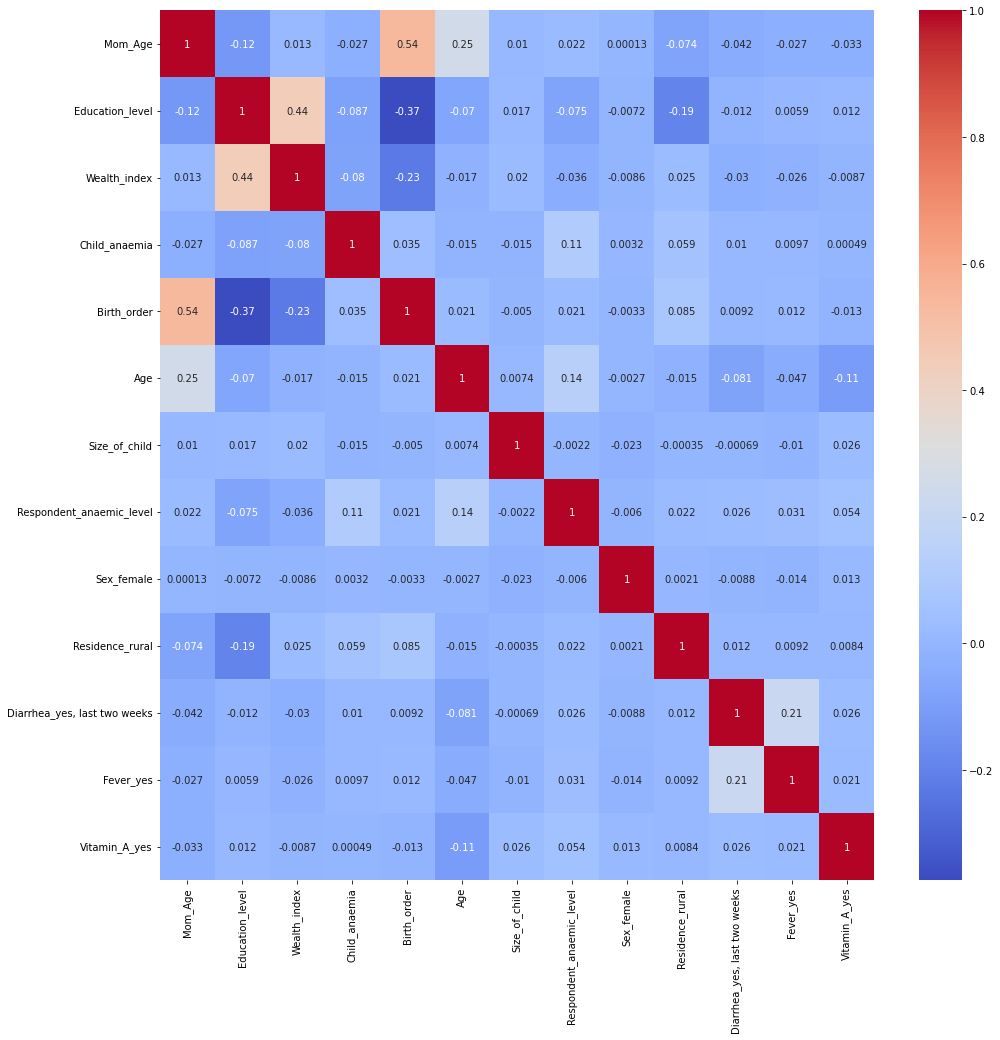

In [36]:
plt.figure(figsize=(16,16))
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [37]:
df2 = pd.read_stata('caseid_y.DTA',index_col='caseid')
df2 = df2.rename_axis("id")

df2

,nutritionalStatus
id,
0100101357 02,1
0100101395 02,1
0100101358 04,1
0100101380 02,1
0100103022 04,1
...,...
3700401511 02,1
3700401542 04,1
3700401583 04,1


In [38]:
df2 = df2[~df2.index.duplicated(keep='first')]
df2
df = df[~df.index.duplicated(keep='first')]
df

,Mom_Age,Education_level,Wealth_index,Mothers_BMI,Child_anaemia,Birth_order,Age,Size_of_child,Respondent_anaemic_level,BMI_std,Sex_female,Residence_rural,"Diarrhea_yes, last two weeks",Fever_yes,Vitamin_A_yes
id,,,,,,,,,,,,,,,
0100101399 02,38,2,3,2919.0,0,3,4.0,2,2,flagged cases,0,1,0,0,0
0100101357 02,39,1,1,2213.0,3,4,1.0,2,2,-206.0,1,1,0,0,0
0100101395 02,35,2,0,3041.0,2,1,2.0,2,2,-162.0,1,1,0,0,0
0100101358 04,30,2,2,2566.0,2,1,1.0,2,2,flagged cases,0,1,0,1,0
0100101380 02,32,2,2,5255.0,2,2,3.0,3,2,-480.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401542 04,24,0,0,2171.0,2,1,1.0,1,2,6.0,1,0,0,0,1
3700401583 04,35,2,1,2462.0,3,1,3.0,2,2,-202.0,0,0,0,0,0
3700401546 02,35,0,2,2637.0,2,2,1.0,2,3,-68.0,0,0,0,0,0


In [39]:
print(df.shape)
print(df2.shape)

(162677, 15)
(164384, 1)


In [40]:
merged_df = pd.merge(df,df2, left_index=True, right_index=True, how='inner')
merged_df

,Mom_Age,Education_level,Wealth_index,Mothers_BMI,Child_anaemia,Birth_order,Age,Size_of_child,Respondent_anaemic_level,BMI_std,Sex_female,Residence_rural,"Diarrhea_yes, last two weeks",Fever_yes,Vitamin_A_yes,nutritionalStatus
id,,,,,,,,,,,,,,,,
0100101357 02,39,1,1,2213.0,3,4,1.0,2,2,-206.0,1,1,0,0,0,1
0100101395 02,35,2,0,3041.0,2,1,2.0,2,2,-162.0,1,1,0,0,0,1
0100101358 04,30,2,2,2566.0,2,1,1.0,2,2,flagged cases,0,1,0,1,0,1
0100101380 02,32,2,2,5255.0,2,2,3.0,3,2,-480.0,0,1,0,0,0,1
0100103022 04,29,2,4,3063.0,2,1,4.0,2,0,389.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401511 02,29,1,0,2751.0,2,4,0.0,2,-1,-386.0,0,0,0,0,0,1
3700401542 04,24,0,0,2171.0,2,1,1.0,1,2,6.0,1,0,0,0,1,1
3700401583 04,35,2,1,2462.0,3,1,3.0,2,2,-202.0,0,0,0,0,0,1


In [41]:
merged_df.info()
print(merged_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 161655 entries,   0100101357 02 to   3700401592 04
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Mom_Age                       161655 non-null  int8    
 1   Education_level               161655 non-null  int8    
 2   Wealth_index                  161655 non-null  int8    
 3   Mothers_BMI                   161655 non-null  category
 4   Child_anaemia                 161655 non-null  int8    
 5   Birth_order                   161655 non-null  int8    
 6   Age                           161655 non-null  float64 
 7   Size_of_child                 161655 non-null  int8    
 8   Respondent_anaemic_level      161655 non-null  int8    
 9   BMI_std                       161655 non-null  category
 10  Sex_female                    161655 non-null  uint8   
 11  Residence_rural               161655 non-null  uint8   
 12  Diarrhea_yes

In [42]:
merged_df['Mothers_BMI'] = merged_df['Mothers_BMI'].astype(str)
merged_df['BMI_std'] = merged_df['BMI_std'].astype(str)

In [43]:
pattern = r'^\-?[0-9]+(\.[0-9]+)?$'

In [44]:
merged_df = merged_df[merged_df['Mothers_BMI'].str.contains(pattern)]
merged_df = merged_df[merged_df['BMI_std'].str.contains(pattern)]


C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\2584625884.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df = merged_df[merged_df['Mothers_BMI'].str.contains(pattern)]
C:\Users\dhruv\AppData\Local\Temp\ipykernel_19936\2584625884.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df = merged_df[merged_df['BMI_std'].str.contains(pattern)]


In [45]:
merged_df.shape

(154463, 16)

In [46]:
merged_df['nutritionalStatus'] = merged_df['nutritionalStatus'].astype(int)


In [47]:
merged_df['Mothers_BMI'] = merged_df['Mothers_BMI'].astype(float)
merged_df['BMI_std'] = merged_df['BMI_std'].astype(float)
merged_df.dtypes

Mom_Age                            int8
Education_level                    int8
Wealth_index                       int8
Mothers_BMI                     float64
Child_anaemia                      int8
Birth_order                        int8
Age                             float64
Size_of_child                      int8
Respondent_anaemic_level           int8
BMI_std                         float64
Sex_female                        uint8
Residence_rural                   uint8
Diarrhea_yes, last two weeks      uint8
Fever_yes                         uint8
Vitamin_A_yes                     uint8
nutritionalStatus                 int32
dtype: object

In [48]:
merged_df

,Mom_Age,Education_level,Wealth_index,Mothers_BMI,Child_anaemia,Birth_order,Age,Size_of_child,Respondent_anaemic_level,BMI_std,Sex_female,Residence_rural,"Diarrhea_yes, last two weeks",Fever_yes,Vitamin_A_yes,nutritionalStatus
id,,,,,,,,,,,,,,,,
0100101357 02,39,1,1,2213.0,3,4,1.0,2,2,-206.0,1,1,0,0,0,1
0100101395 02,35,2,0,3041.0,2,1,2.0,2,2,-162.0,1,1,0,0,0,1
0100101380 02,32,2,2,5255.0,2,2,3.0,3,2,-480.0,0,1,0,0,0,1
0100103022 04,29,2,4,3063.0,2,1,4.0,2,0,389.0,0,1,0,0,0,1
0100103098 02,28,2,3,2338.0,0,1,0.0,2,-1,48.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700401534 14,27,0,2,2616.0,3,2,1.0,2,0,-94.0,0,0,0,0,1,1
3700401511 02,29,1,0,2751.0,2,4,0.0,2,-1,-386.0,0,0,0,0,0,1
3700401542 04,24,0,0,2171.0,2,1,1.0,1,2,6.0,1,0,0,0,1,1


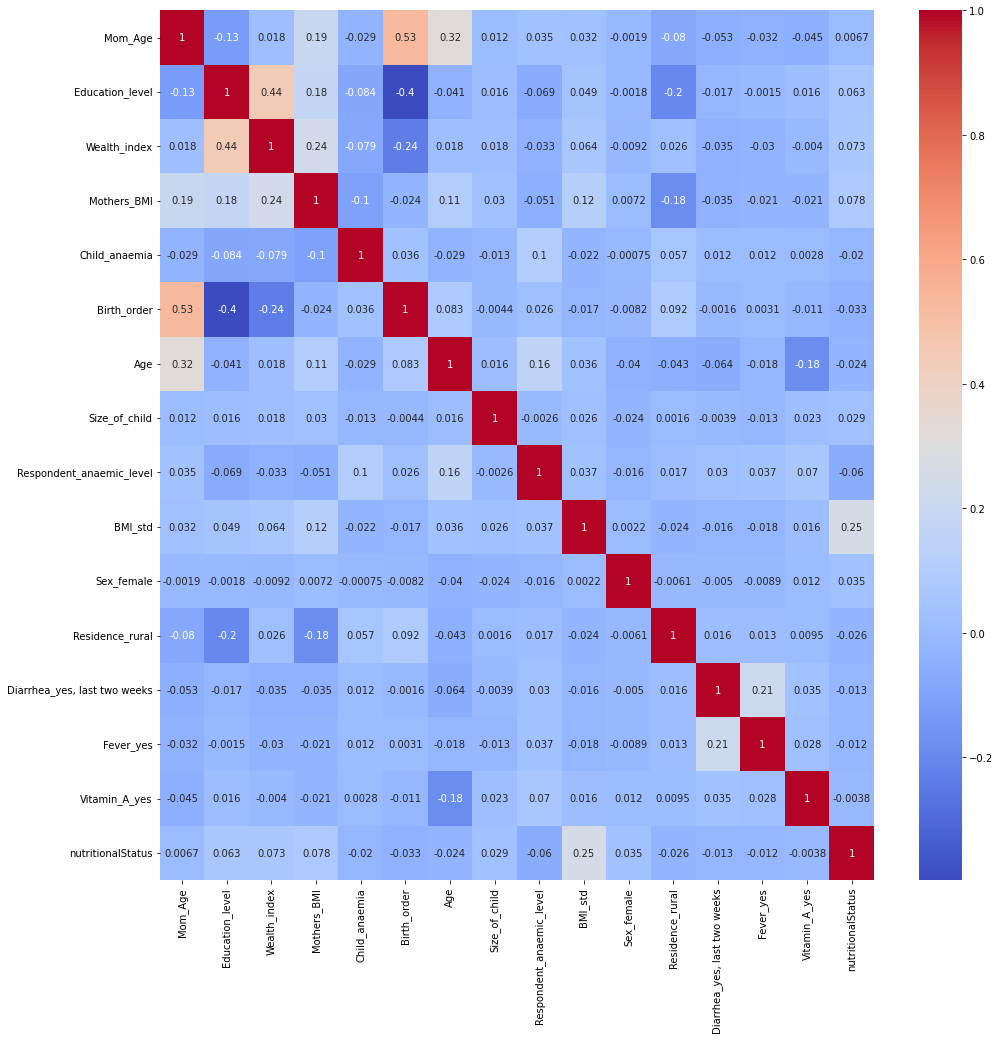

In [49]:
plt.figure(figsize=(16,16))
corr_matrix = merged_df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = merged_df.drop(columns=['nutritionalStatus'])
y = merged_df['nutritionalStatus']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = dt.predict(X_test)

In [57]:
accuracy = dt.score(X_test,y_test)
accuracy

0.9272752241382692

In [ ]:
fff